<h1 style="color:red; text-align:center; text-decoration:underline;">Gradient Boosting : Apprentissage par correction d’erreur</h1>


<h2 style="color:green; text-decoration:underline;">Test 1 : Régression avec Gradient Boosting</h2>

Ce test applique le Gradient Boosting à une tâche de régression. Le modèle commence par une estimation simple (la moyenne), puis construit des arbres successifs, chacun apprenant à corriger les erreurs (résidus) du précédent.


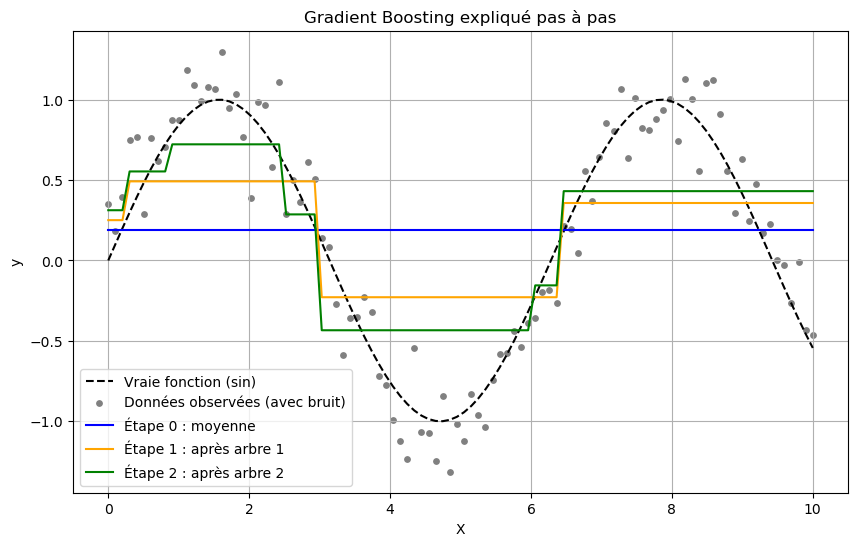

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# -------------------------------
# Étape 1 : Générer des données simples (fonction sin bruitée)
# -------------------------------
np.random.seed(0)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y_true = np.sin(X).ravel()                       # vraie fonction cible
y = y_true + np.random.normal(0, 0.2, size=100)  # ajouter du bruit (données observées)

# -------------------------------
# Étape 2 : Gradient Boosting simulé manuellement (2 arbres faibles)
# -------------------------------

# 1. Prédiction initiale : moyenne constante
y_pred_0 = np.full_like(y, fill_value=np.mean(y))
residual_1 = y - y_pred_0  # erreur à corriger

# 2. Arbre 1 : apprend à prédire les résidus
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(X, residual_1)
prediction1 = tree1.predict(X)
y_pred_1 = y_pred_0 + 0.5 * prediction1  # mise à jour avec learning_rate=0.5

# 3. Arbre 2 : apprend les erreurs restantes
residual_2 = y - y_pred_1
tree2 = DecisionTreeRegressor(max_depth=2)
tree2.fit(X, residual_2)
prediction2 = tree2.predict(X)
y_pred_2 = y_pred_1 + 0.5 * prediction2  # prédiction finale après 2 arbres

# -------------------------------
# Étape 3 : Visualisation des étapes
# -------------------------------
plt.figure(figsize=(10, 6))
plt.plot(X, y_true, label='Vraie fonction (sin)', color='black', linestyle='dashed')
plt.scatter(X, y, label='Données observées (avec bruit)', color='gray', s=15)
plt.plot(X, y_pred_0, label='Étape 0 : moyenne', color='blue')
plt.plot(X, y_pred_1, label='Étape 1 : après arbre 1', color='orange')
plt.plot(X, y_pred_2, label='Étape 2 : après arbre 2', color='green')
plt.title("Gradient Boosting expliqué pas à pas")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le Gradient Boosting débute par une estimation simple, généralement la moyenne, puis améliore progressivement les performances du modèle en ajoutant des arbres de décision faibles, chacun entraîné à corriger les erreurs (résidus) du modèle précédent. Ce mécanisme d’apprentissage itératif permet une réduction progressive du biais, conduisant à un modèle final à la fois puissant et précis. L’approche ne repose pas sur un modèle complexe dès le départ, mais sur une construction intelligente par étapes successives. Les résultats obtenus dans ce test montrent une amélioration continue de la prédiction, tout en maîtrisant le risque de surapprentissage grâce à la régularisation implicite offerte par l’ajout contrôlé d’arbres.


<h2 style="color:green; text-decoration:underline;">Test 2 : Comparaison avec un arbre unique</h2>

Dans ce second test, un Gradient Boosting est comparé à un arbre de décision simple.  
L’objectif est de mettre en évidence l’intérêt de la combinaison séquentielle d’arbres faibles.


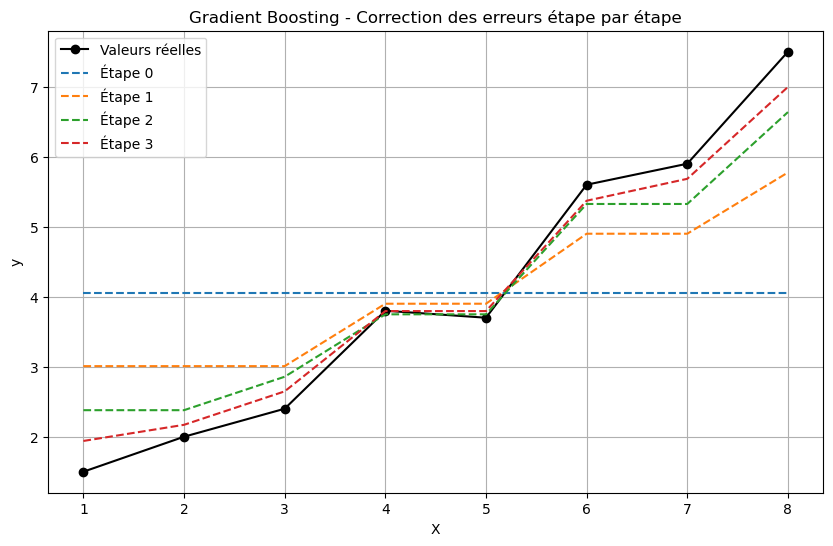

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# ----------------------------
# Étape 1 : Générer des données simples
# ----------------------------
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([1.5, 2.0, 2.4, 3.8, 3.7, 5.6, 5.9, 7.5])  # tendance non linéaire

# ----------------------------
# Étape 2 : Initialisation avec une constante
# ----------------------------
# Prédiction initiale : moyenne
y_pred = np.full_like(y, fill_value=np.mean(y), dtype=float)
residuals = y - y_pred

# Pour afficher l’évolution
steps = [y_pred.copy()]
trees = []

# ----------------------------
# Étape 3 : Apprentissage de 3 arbres successifs
# ----------------------------
for i in range(3):
    tree = DecisionTreeRegressor(max_depth=2)
    tree.fit(X, residuals)              # apprend à prédire l’erreur
    update = tree.predict(X)            # nouvelle correction
    y_pred += 0.5 * update              # learning_rate = 0.5
    residuals = y - y_pred              # nouvelle erreur
    steps.append(y_pred.copy())
    trees.append(tree)

# ----------------------------
# Étape 4 : Affichage de la progression
# ----------------------------
plt.figure(figsize=(10, 6))
plt.plot(X.ravel(), y, 'ko-', label='Valeurs réelles')
for i, step in enumerate(steps):
    plt.plot(X.ravel(), step, '--', label=f"Étape {i}")

plt.title("Gradient Boosting - Correction des erreurs étape par étape")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le Gradient Boosting commence par une estimation brute, puis chaque nouvel arbre apprend à corriger les erreurs résiduelles du précédent. Ce mécanisme de correction successive constitue l’essence même du “boosting” : chaque itération renforce la performance du modèle précédent. Dans ce test comparatif avec un arbre de décision simple, on observe que l’arbre unique montre des limites importantes en termes de précision et de capacité à généraliser. À l’inverse, le modèle de Gradient Boosting améliore progressivement la qualité des prédictions à chaque étape, atteignant une performance nettement supérieure. Cela illustre la capacité du boosting à construire un modèle robuste et expressif à partir d’apprenants faibles, en accumulant les ajustements de manière ciblée et efficace.
